In [1]:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [11]:
# Load MLS csv 
mls_csv= os.path.join('..', 'Resources','mlscleaned.csv')
mls_df = pd.read_csv(mls_csv)

mls_df.head()

,Unnamed: 0,Year,Rental Housing Available,Rentals Sales Number Total,Rentals Sales Price Trend,Private Housing Available,Private Sales Number Total,Sales Price Trend Total,Both Available Housing,Both Housing Sales Number Total,Both Sales Price Trend
0,0,2014,"18,141","9,191","57,154","80,137","15,863","3,979,052","98,278",25054,"4,036,206"
1,1,2015,"14,561","8,711","56,901","85,971","21,544","4,390,349","100,532",30255,"4,447,250"
2,2,2016,"15,008","8,540","57,055","75,308","21,328","4,825,235","90,316",29868,"4,882,290"
3,3,2017,"15,375","8,990","56,868","66,236","21,824","5,354,151","81,611",30814,"5,411,019"


In [3]:
# Load census csv
csv = "../Resources/demographics.csv"
census_df = pd.read_csv(csv)

census_df.head()

,Year,Households,Households (Family),Households (Non-Family),Average Household Size,Average Family Size,Number of Higher Ed Enrolled,Education of Some College - No Degree Attained,Education of Associate's Degree Attained,Education of Bachelor's Degree Attained,...,Race - American Indian and Alaska Native,Race - Asian,Race - Native Hawaiian and Other Pacific Islander,Race - Other,Race - Two or More,Race - Hispanic or Latino,Age 20 to 34 Years,Age 35 to 54 Years,Age 55 to 64 Years,Age 65+ Years
0,2014,444543,283682,160861,2.75,3.40,122968,161727,95527,170560,...,2682,64590,623,66597,38223,1253001,311534,347842,135758,135067
1,2015,457736,301978,155758,2.74,3.30,113112,172427,89449,185472,...,2783,68409,1617,85157,36917,1288126,322366,355455,141233,141859
2,2016,468515,301665,166850,2.74,3.34,130436,161389,90715,196945,...,1697,70844,50,67741,46020,1314367,326590,360554,146290,147439
3,2017,460602,303666,156936,2.86,3.47,117462,169812,114043,206650,...,2743,69335,1623,107587,49895,1348975,332631,368918,150023,157962


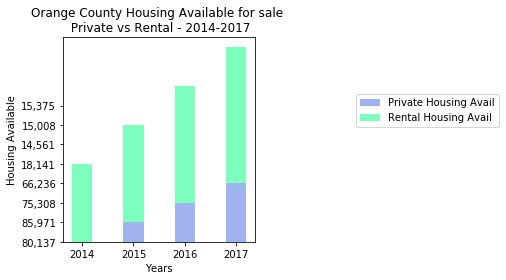

In [4]:
# AVAILABILITY PLOTTING

x_axis=census_df["Year"]

#y axis
yRental=np.array(mls_df['Rental Housing Available'])
yPrivate=np.array(mls_df['Private Housing Available'])
yAll=np.array(mls_df['Both Available Housing'])

#parameter settings
bar_width = .4
opacity = 0.5

#axis formatting
plt.title('Orange County Housing Available for sale \n Private vs Rental - 2014-2017')
plt.xlabel("Years")
plt.ylabel("Housing Available")

#plot
plt.bar(x_axis, yPrivate, -bar_width, alpha=opacity, color='royalblue', label='Private Housing Avail')
plt.bar(x_axis, yRental, bar_width, bottom=yPrivate,alpha=opacity, color='springgreen', label='Rental Housing Avail')


plt.legend(bbox_to_anchor=(1.5, .75))

#save
plt.tight_layout()
plt.savefig("../output/RentalVsPrivateSBC.png")
plt.show()


ValueError: could not convert string to float: '18,14114,56115,00815,375'

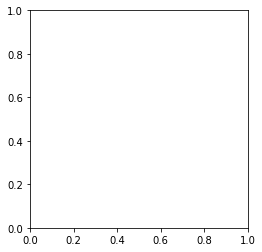

In [5]:
# AVAILABILITY PLOTTING - nested Pie

#Data
availType = np.array([yRental, yPrivate])
availYrs = np.array(mls_df['Both Available Housing'])

#formatting
outerLabels=['Rental','Private']
explode=(.05, 0)
size = 0.5

#colors
outer_colors = ['springgreen','royalblue']
inner_colors = ['lightblue','orange','cyan','magenta']

#Plot
fig, ax = plt.subplots()
ax.pie(availType.sum(axis=1), explode=explode, labels=outerLabels,radius=1, colors=outer_colors, autopct='%1.1f%%',wedgeprops=dict(width=size, edgecolor='w'))
ax.pie(availType.flatten(),  radius=1.23-size,   colors=inner_colors, autopct='%1.1f%%',labeldistance=0.8,wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Orange County Housing Available for sale - Private vs Rental')

plt.legend(['Rental', 'Private', '2014', '2015', '2016', '2017'],bbox_to_anchor=(1.5, .75))

#save
plt.tight_layout()
plt.savefig("../output/AvailNestedPC.png")
plt.show()

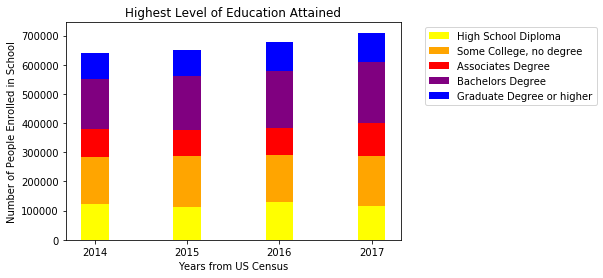

In [6]:
# EDUCATION PLOT

# Extract school levels as list
highschool = census_df["Number of Higher Ed Enrolled"].tolist()
somecollege = census_df["Education of Some College - No Degree Attained"].tolist()
associates = census_df["Education of Associate's Degree Attained"].tolist()
bachelors = census_df["Education of Bachelor's Degree Attained"].tolist()
graduate = census_df["Education of Graduate or Professional Degree Attained"].tolist()

# Define where bars stack on each other on y-axis
assoc_bot = [i+j for i,j in zip(highschool, somecollege)]
bach_bot = [i+j for i,j in zip(assoc_bot, associates)]
grad_bot = [i+j for i,j in zip(bach_bot, bachelors)]

# Single place to adjust bar width
width = .3

# Plots
edu_hs = plt.bar(x_axis, highschool, width, label="High School Diploma",color='yellow')
edu_some = plt.bar(x_axis, somecollege, width, bottom=highschool, label="Some College, no degree", color='orange')
edu_assoc = plt.bar(x_axis, associates, width, bottom=assoc_bot, label="Associates Degree", color='r')
edu_bach = plt.bar(x_axis, bachelors, width, bottom=bach_bot, label="Bachelors Degree", color='purple')
edu_grad = plt.bar(x_axis, graduate, width, bottom=grad_bot, label="Graduate Degree or higher", color='blue')

# Labeling
plt.xlabel("Years from US Census")
plt.ylabel("Number of People Enrolled in School")
plt.title('Highest Level of Education Attained')
plt.xticks(x_axis, ('2014', '2015', '2016', '2017'))
plt.legend(bbox_to_anchor=(1.6, 1))

plt.savefig("../output/education.png")
plt.show()

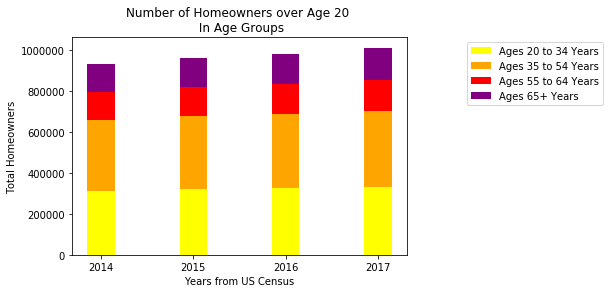

In [7]:
# AGE PLOT

# Extract age ranges as list
agegrp1 = census_df["Age 20 to 34 Years"].tolist()
agegrp2 = census_df["Age 35 to 54 Years"].tolist()
agegrp3 = census_df["Age 55 to 64 Years"].tolist()
agegrp4 = census_df["Age 65+ Years"].tolist()

# Define where bars stack on each other on y-axis

agegrp3_bot = [i+j for i,j in zip(agegrp1, agegrp2)]
agegrp4_bot = [i+j for i,j in zip(agegrp3_bot, agegrp3)]
agegrp5_bot = [i+j for i,j in zip(agegrp4_bot, agegrp4)]


# Single place to adjust bar width
width = .3

# Plots
agegrp1_plt = plt.bar(x_axis, agegrp1, width, label="Ages 20 to 34 Years", color='yellow')
agegrp2_plt = plt.bar(x_axis, agegrp2, width, bottom=agegrp1, label="Ages 35 to 54 Years", color='orange')
agegrp3_plt = plt.bar(x_axis, agegrp3, width, bottom=agegrp3_bot, label="Ages 55 to 64 Years", color='red')
agegrp4_plt = plt.bar(x_axis, agegrp4, width, bottom=agegrp4_bot, label="Ages 65+ Years", color="purple")


# Labeling
plt.xlabel("Years from US Census")
plt.ylabel("Total Homeowners")
plt.title('Number of Homeowners over Age 20 \n In Age Groups')
plt.xticks(x_axis, ('2014', '2015', '2016', '2017'))
plt.legend(bbox_to_anchor=(1.6, 1))

plt.savefig("../output/age_groups.png")
plt.show()

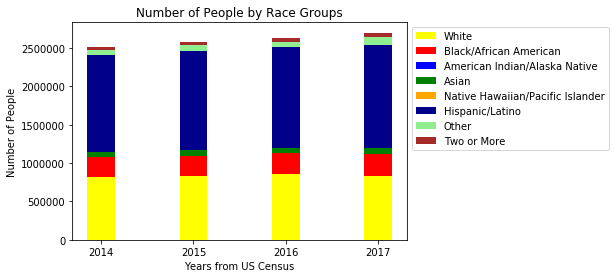

In [8]:
racegrp1 = census_df["Race - White"].tolist()
racegrp2 = census_df["Race - Black or African American"].tolist()
racegrp3 = census_df["Race - American Indian and Alaska Native"].tolist()
racegrp4 = census_df["Race - Asian"].tolist()
racegrp5 = census_df["Race - Native Hawaiian and Other Pacific Islander"].tolist()
racegrp6 = census_df["Race - Hispanic or Latino"].tolist()
racegrp7 = census_df["Race - Other"].tolist()
racegrp8 = census_df["Race - Two or More"].tolist()

# Define where bars stack on each other on y-axis

racegrp3_bot = [i+j for i,j in zip(racegrp1, racegrp2)]
racegrp4_bot = [i+j for i,j in zip(racegrp3_bot, racegrp3)]
racegrp5_bot = [i+j for i,j in zip(racegrp4_bot, racegrp4)]
racegrp6_bot = [i+j for i,j in zip(racegrp5_bot, racegrp5)]
racegrp7_bot = [i+j for i,j in zip(racegrp6_bot, racegrp6)]
racegrp8_bot = [i+j for i,j in zip(racegrp7_bot, racegrp7)]
racegrp9_bot = [i+j for i,j in zip(racegrp8_bot, racegrp8)]

# Single place to adjust bar width
width = .3

# Plots
racegrp1_plt = plt.bar(x_axis, racegrp1, width, label="White", color='yellow')
racegrp2_plt = plt.bar(x_axis, racegrp2, width, bottom=racegrp1, label="Black/African American", color='red')
racegrp3_plt = plt.bar(x_axis, racegrp3, width, bottom=racegrp3_bot, label="American Indian/Alaska Native", color='blue')
racegrp4_plt = plt.bar(x_axis, racegrp4, width, bottom=racegrp4_bot, label="Asian", color="green")
racegrp5_plt = plt.bar(x_axis, racegrp5, width, bottom=racegrp5_bot, label="Native Hawaiian/Pacific Islander", color="orange")
racegrp6_plt = plt.bar(x_axis, racegrp6, width, bottom=racegrp6_bot, label="Hispanic/Latino", color="darkblue")
racegrp7_plt = plt.bar(x_axis, racegrp7, width, bottom=racegrp7_bot, label="Other", color="lightgreen")
racegrp8_plt = plt.bar(x_axis, racegrp8, width, bottom=racegrp8_bot, label="Two or More", color="brown")

# Labeling
plt.xlabel("Years from US Census")
plt.ylabel("Number of People")
plt.title('Number of People by Race Groups')
plt.xticks(x_axis, ('2014', '2015', '2016', '2017'))
plt.legend(bbox_to_anchor=(1, 1))

plt.savefig("../output/race_groups.png")
plt.show()

In [10]:
# AVERAGE house price retrieve data

#avg_hs_price = [mls_df["yrAvg_spTrend"] for x in x_axis if (mls_df["Year"] == x) & (mls_df["Property Type"] == "Both")]

avg_hs_price = mls_df["Both Sales Price Trend"].tolist()
avg_priv_price = mls_df["Private Sales Price Trend Total"].tolist()
avg_rent_price = mls_df["Rentals Sales Price Trend"].tolist()

# Change to numeric from string
avg_hs_price

KeyError: 'Private Sales Price Trend Total'

In [9]:
# AVERAGE INCOME retrieve data

# Extract average income as list
inc_med_hsld = census_df["Median Household Income (in dollars)"].tolist()
inc_mean_hsld = census_df["Mean Household Income (in dollars)"].tolist()
inc_med_fam = census_df["Median Family Income (in dollars)"].tolist()
inc_mean_fam = census_df["Mean Family Income (in dollars)"].tolist()
inc_med_nfam = census_df["Median Non-Family Income (in dollars)"].tolist()
inc_mean_nfam = census_df["Mean Non-Family Income (in dollars)"].tolist()

In [ ]:
# MEAN LINE PLOT

# Plots
plt.plot(x_axis, inc_mean_hsld, label="Mean Household Income",marker='^', color='r')
plt.plot(x_axis, inc_mean_fam,  label="Mean Family Income", marker='o', color='blue',linestyle="--")
plt.plot(x_axis, inc_mean_nfam, label="Mean Non-Family Income", marker='s', color='green',linestyle="--")
plt.plot(x_axis, avg_hs_price, label="Average Housing Price",marker='X', color='purple')

# Labeling
plt.xlabel("Year in US Census and MLS")
plt.ylabel("US Dollars")
plt.title('Mean Yearly income to Average Home Price')
plt.xticks(x_axis, ('2014', '2015', '2016', '2017'))
plt.legend(bbox_to_anchor=(1.6, 1))

plt.savefig("../output/mean_inc_price.png")
plt.show()

In [ ]:
# MEDIAN LINE PLOT

# Plots
plt.plot(x_axis, inc_med_hsld, label="Median Household Income",marker='^', color='red')
plt.plot(x_axis, inc_med_fam, label="Median Family Income (in dollars)", marker='o', color='orange',linestyle="--")
plt.plot(x_axis, inc_med_nfam, label="Median Non-Family Income", marker='s', color='yellow',linestyle="--")
plt.plot(x_axis, avg_hs_price, label="Average Housing Price",marker='X', color='purple')

# Labeling
plt.xlabel("Year in US Census and MLS")
plt.ylabel("US Dollars")
plt.title('Median Yearly income to Average Home Price')
plt.xticks(x_axis, ('2014', '2015', '2016', '2017'))
plt.legend(bbox_to_anchor=(1.6, 1))

plt.savefig("../output/median_inc_price.png")
plt.show()